In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [63]:
df = pd.read_csv("datos.csv")

In [64]:
df.info

<bound method DataFrame.info of       LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  ExterQual  \
0        8450            7            5         19            19          4   
1        9600            6            8         46            46          3   
2       11250            7            5         21            20          4   
3        9550            7            5        107            52          3   
4       14260            8            5         22            22          4   
...       ...          ...          ...        ...           ...        ...   
1455     7917            6            5         23            22          3   
1456    13175            6            6         44            34          3   
1457     9042            7            9         81            16          5   
1458     9717            5            6         72            26          3   
1459     9937            5            6         57            57          4   

      ExterCond  Be

In [65]:
df

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BedroomAbvGr,GarageCars,PoolArea,SalePrice,Artery
0,8450,7,5,19,19,4,3,3,2,0,208500,0
1,9600,6,8,46,46,3,3,3,2,0,181500,0
2,11250,7,5,21,20,4,3,3,2,0,223500,0
3,9550,7,5,107,52,3,3,3,3,0,140000,0
4,14260,8,5,22,22,4,3,4,3,0,250000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,23,22,3,3,3,2,0,175000,0
1456,13175,6,6,44,34,3,3,3,2,0,210000,0
1457,9042,7,9,81,16,5,4,4,1,0,266500,0
1458,9717,5,6,72,26,3,3,2,1,0,142125,0


In [66]:
df = df[["LotArea","OverallQual","BedroomAbvGr","YearRemodAdd","GarageCars","Artery","SalePrice"]]

In [67]:
df

,LotArea,OverallQual,BedroomAbvGr,YearRemodAdd,GarageCars,Artery,SalePrice
0,8450,7,3,19,2,0,208500
1,9600,6,3,46,2,0,181500
2,11250,7,3,20,2,0,223500
3,9550,7,3,52,3,0,140000
4,14260,8,4,22,3,0,250000
...,...,...,...,...,...,...,...
1455,7917,6,3,22,2,0,175000
1456,13175,6,3,34,2,0,210000
1457,9042,7,4,16,1,0,266500
1458,9717,5,2,26,1,0,142125


In [68]:
df.describe()

,LotArea,OverallQual,BedroomAbvGr,YearRemodAdd,GarageCars,Artery,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,2.866438,37.134247,1.767123,0.032877,180921.195890
std,9981.264932,1.382997,0.815778,20.645407,0.747315,0.178375,79442.502883
min,1300.000000,1.000000,0.000000,12.000000,0.000000,0.000000,34900.000000
25%,7553.500000,5.000000,2.000000,18.000000,1.000000,0.000000,129975.000000
50%,9478.500000,6.000000,3.000000,28.000000,2.000000,0.000000,163000.000000
75%,11601.500000,7.000000,3.000000,55.000000,2.000000,0.000000,214000.000000
max,215245.000000,10.000000,8.000000,72.000000,4.000000,1.000000,755000.000000


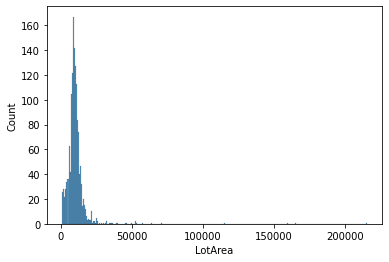

In [69]:
sns.histplot(x=df["LotArea"])

In [70]:
q1 = df["LotArea"].quantile(.25)

In [71]:
q1

7553.5

In [72]:
q3 = df["LotArea"].quantile(.75)

In [73]:
q3

11601.5

In [74]:
iqr= q3-q1

In [75]:
iqr

4048.0

In [76]:
lim_inferior =q1-iqr*1.5

In [77]:
lim_superior =q3+iqr*1.5

In [78]:
df=df[(df["LotArea"]>=lim_inferior)&(df['LotArea']<=lim_superior)]

In [79]:
df

,LotArea,OverallQual,BedroomAbvGr,YearRemodAdd,GarageCars,Artery,SalePrice
0,8450,7,3,19,2,0,208500
1,9600,6,3,46,2,0,181500
2,11250,7,3,20,2,0,223500
3,9550,7,3,52,3,0,140000
4,14260,8,4,22,3,0,250000
...,...,...,...,...,...,...,...
1455,7917,6,3,22,2,0,175000
1456,13175,6,3,34,2,0,210000
1457,9042,7,4,16,1,0,266500
1458,9717,5,2,26,1,0,142125


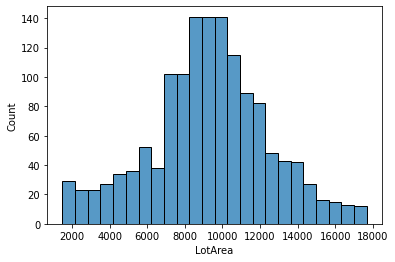

In [80]:
sns.histplot(x=df["LotArea"])

In [82]:
y = df["SalePrice"]
x = df[["LotArea","OverallQual","BedroomAbvGr","YearRemodAdd","GarageCars","Artery"]]
x = sm.add_constant(x)
model = sm.OLS(y, x)
reg = model.fit()
reg.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     678.4
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        22:12:38   Log-Likelihood:                -16648.
No. Observations:                1391   AIC:                         3.331e+04
Df Residuals:                    1384   BIC:                         3.335e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8.675e+04   7545.774    -11.497      0.000   -1.02e+05    -7.2e+04
LotArea          5.1794      0.354     14.637      0.000       4.485       5.874
OverallQual   3.163e+04   1045.762     30.246      0.000    2.96e+04    3.37e+04
BedroomAbvGr  2667.2398   1346.592      1.981      0.048      25.658    5308.821
YearRemodAdd  -414.8034     61.523     -6.742      0.000    -535.492    -294.115
GarageCars    1.856e+04   1793.179     10.349      0.000     1.5e+04    2.21e+04
Artery       -1.737e+04   5953.320     -2.918      0.004    -2.9e+04   -5692.505
==============================================================================
Omnibus:                      688.041   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9965.207
Skew:                           1.934   Prob(JB):                         0.00
Kurtosis:                      15.529   Cond. No.                     7.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
reg.params["Artery"]

-17371.01061247571

In [85]:
y = np.log(df["SalePrice"])
x = df[["LotArea","OverallQual","BedroomAbvGr","YearRemodAdd","GarageCars","Artery"]]
x = sm.add_constant(x)
model = sm.OLS(y, x)
reg = model.fit()
reg.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     947.4
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        22:12:55   Log-Likelihood:                 458.04
No. Observations:                1391   AIC:                            -902.1
Df Residuals:                    1384   BIC:                            -865.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.6511      0.034    309.458      0.000      10.584      10.719
LotArea       2.428e-05   1.61e-06     15.042      0.000    2.11e-05    2.74e-05
OverallQual      0.1559      0.005     32.688      0.000       0.147       0.165
BedroomAbvGr     0.0401      0.006      6.530      0.000       0.028       0.052
YearRemodAdd    -0.0032      0.000    -11.508      0.000      -0.004      -0.003
GarageCars       0.1110      0.008     13.566      0.000       0.095       0.127
Artery          -0.1193      0.027     -4.393      0.000      -0.173      -0.066
==============================================================================
Omnibus:                      143.199   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              401.337
Skew:                          -0.542   Prob(JB):                     7.09e-88
Kurtosis:                       5.397   Cond. No.                     7.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
reg.params["Artery"]

-0.10379115963407237

el modelo muestra que las variables que afectan significativamente el precio de la vivienda son el tamaño del area en donde esta 
la casa, el estado de la casa, el numero de habitaciones, el año de remodelacion, el numero de garages y la variable de que tan cerca se encuentra el foco de contaminacion.

- la variable arteria, da como resultado que reduce un 11.9% el precio de la vivienda
- la variable garage, aumenta el precio de la vivienda en un 11.1%
- El año de remodelacion afecta negativamente el precio de la casa entre mas años el precio disminuye un 0,03% lo que es igual a 414.8034 dolares
- El numero de habitaciones incrementa el precio de la vivienda en un 4% lo que es igual a 2667.2398 por habitacion
- El estado de la casa incrementa un 15% si este se presenta de manera positiva 
- el tamaño de la vivienda incremente el precio de la vivienda 	5.1794 dolares por cada f^2